<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/02.Week_1_Classification_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Pytorch dan Tensorflow**

In [ ]:
# !pip install tensorflow
# !pip install torch torchvision

## **Import Library**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
from imblearn.over_sampling import SMOTE

## **DATA EXPLORING**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/income.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [ ]:
df['income'] = df['income'].astype(str).str.replace('.', '')

In [ ]:
label = LabelEncoder()
df = df.apply(label.fit_transform)

In [ ]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.019270,-0.077828,-0.009854,0.033141,-0.265027,-0.014982,-0.259448,0.027789,0.086760,0.126293,0.062505,0.079194,-0.002324,0.231951
workclass,0.019270,1.000000,-0.023690,0.018349,0.041320,-0.052881,0.196587,-0.080481,0.055397,0.085464,0.022946,0.014112,0.114924,-0.004803,0.035940
fnlwgt,-0.077828,-0.023690,1.000000,-0.023996,-0.040425,0.031314,0.000402,0.007577,-0.012594,0.028776,-0.007000,-0.004009,-0.015368,-0.057355,-0.007095
education,-0.009854,0.018349,-0.023996,1.000000,0.356711,-0.039854,-0.022214,-0.011974,0.013634,-0.027266,0.033038,0.017779,0.058350,0.066503,0.081259
education-num,0.033141,0.041320,-0.040425,0.356711,1.000000,-0.068859,0.105001,-0.090376,0.031218,0.007754,0.153756,0.085279,0.145040,0.061921,0.332980
marital-status,-0.265027,-0.052881,0.031314,-0.039854,-0.068859,1.000000,-0.005848,0.185554,-0.069779,-0.126554,-0.074123,-0.034753,-0.185584,-0.021625,-0.196640
occupation,-0.014982,0.196587,0.000402,-0.022214,0.105001,-0.005848,1.000000,-0.067567,0.004752,0.069838,0.023900,0.017347,0.060643,-0.007484,0.066585
relationship,-0.259448,-0.080481,0.007577,-0.011974,-0.090376,0.185554,-0.067567,1.000000,-0.117834,-0.581571,-0.093686,-0.060112,-0.254283,-0.004624,-0.253330
race,0.027789,0.055397,-0.012594,0.013634,0.031218,-0.069779,0.004752,-0.117834,1.000000,0.087803,0.025240,0.018712,0.040936,0.133851,0.071092
sex,0.086760,0.085464,0.028776,-0.027266,0.007754,-0.126554,0.069838,-0.581571,0.087803,1.000000,0.076550,0.049207,0.231159,-0.009453,0.215346


In [ ]:
df.duplicated().sum()

19

In [ ]:
df.isna().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47573 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             47573 non-null  int64
 1   workclass       47573 non-null  int64
 2   fnlwgt          47573 non-null  int64
 3   education       47573 non-null  int64
 4   education-num   47573 non-null  int64
 5   marital-status  47573 non-null  int64
 6   occupation      47573 non-null  int64
 7   relationship    47573 non-null  int64
 8   race            47573 non-null  int64
 9   sex             47573 non-null  int64
 10  capital-gain    47573 non-null  int64
 11  capital-loss    47573 non-null  int64
 12  hours-per-week  47573 non-null  int64
 13  native-country  47573 non-null  int64
 14  income          47573 non-null  int64
dtypes: int64(15)
memory usage: 5.8 MB


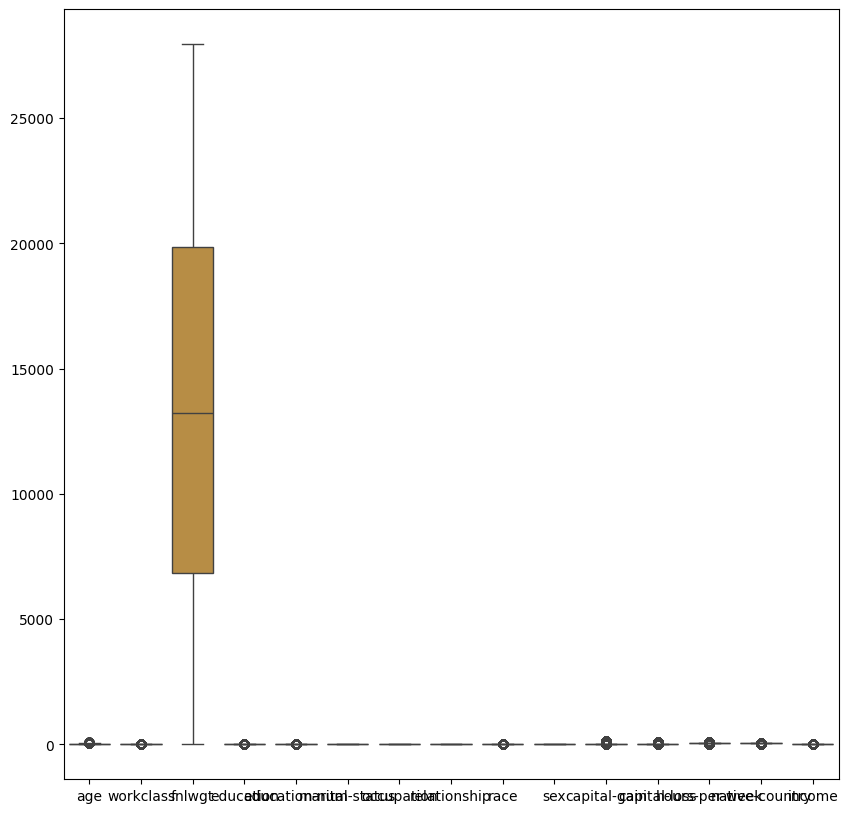

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.show()

## **Data Preparation**

In [ ]:
X = df.select_dtypes(include=np.number).drop('income', axis=1)
y = df['income']

In [ ]:
Counter(y)

Counter({0: 37155, 1: 11687})

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_scaler = StandardScaler()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_train.shape

(59448, 14)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

## **Tensorflow Model**

In [ ]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy'
)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split= 0.15, callbacks=[early_stopping])

Epoch 1/100
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4109 - val_loss: 0.3492
Epoch 2/100
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3341 - val_loss: 0.3413
Epoch 3/100
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3216 - val_loss: 0.3272
Epoch 4/100
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3146 - val_loss: 0.3329
Epoch 5/100
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3049 - val_loss: 0.3185
Epoch 6/100
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2955 - val_loss: 0.3111
Epoch 7/100
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2863 - val_loss: 0.3087
Epoch 8/100
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2796 - val_loss: 0.2983
Epoch 9/100
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2737 - val_loss: 0.3221
Epoch 10/100
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2668 - val_loss: 0.2908
Epoch 11/100
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2630 - val_loss: 0.2917
Epoch 12/100
1580/1

In [ ]:
y_test.min(), y_test.max()

(0, 1)

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.8738
Precision: 0.8789
Recall: 0.8647
F1-score: 0.8717
AUC: 0.9546


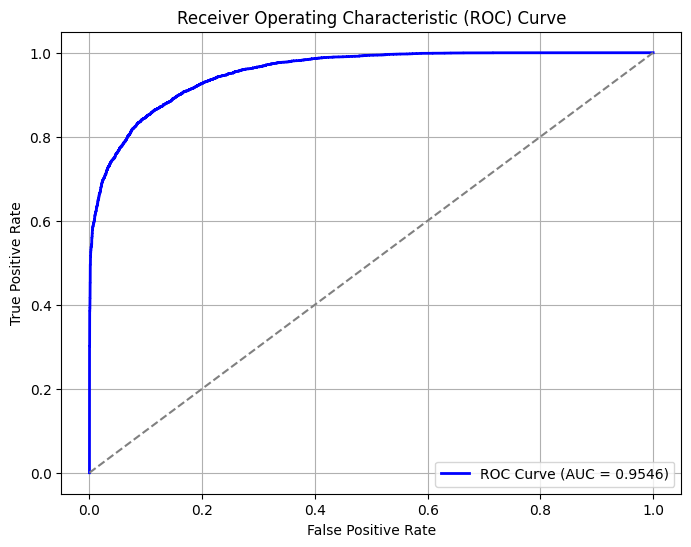

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## **Pytorch Model**

In [ ]:
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self,input):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [ ]:
model = SimpleNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
y_preds = []
y_actuals = []

for epoch in range(100):
    # Training phase
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch.view(-1, 1))

    loss.backward()
    optimizer.step()

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_torch)
        val_loss = criterion(val_outputs, y_test_torch.view(-1, 1))

        # Simpan hasil prediksi
        y_preds.extend(val_outputs.detach().numpy().flatten())
        y_actuals.extend(y_test_torch.numpy().flatten())

    # Cetak loss setiap 10 epoch
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

print("PyTorch model training complete!")


Epoch 0, Training Loss: 0.7266104221343994, Validation Loss: 0.7212600708007812
Epoch 10, Training Loss: 0.6764315962791443, Validation Loss: 0.6716017127037048
Epoch 20, Training Loss: 0.6341034770011902, Validation Loss: 0.6295198202133179
Epoch 30, Training Loss: 0.5982502102851868, Validation Loss: 0.5937862992286682
Epoch 40, Training Loss: 0.5679280161857605, Validation Loss: 0.563525378704071
Epoch 50, Training Loss: 0.5425569415092468, Validation Loss: 0.5382080078125
Epoch 60, Training Loss: 0.5217745900154114, Validation Loss: 0.5174958109855652
Epoch 70, Training Loss: 0.5050830245018005, Validation Loss: 0.5008757710456848
Epoch 80, Training Loss: 0.49177902936935425, Validation Loss: 0.487689733505249
Epoch 90, Training Loss: 0.48111048340797424, Validation Loss: 0.4771583676338196
PyTorch model training complete!


In [ ]:
y_test_torch.min(), y_test_torch.max()

(tensor(0.), tensor(1.))

Accuracy: 0.7802
Precision: 0.7658
Recall: 0.8017
F1-score: 0.7834
AUC: 0.8619


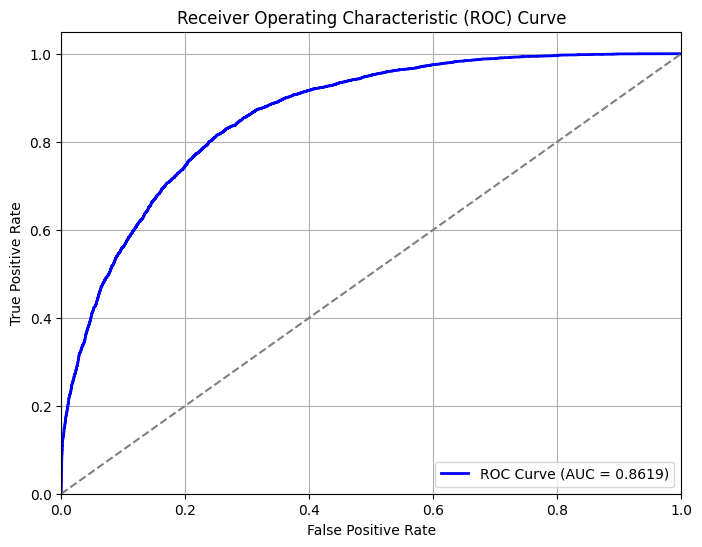

In [ ]:
from sklearn.metrics import roc_curve

model.eval()

with torch.no_grad():
    y_pred_probs = model(X_test_torch).cpu().numpy()  # Konversi ke NumPy

# Konversi probabilitas ke label biner
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluasi model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs)

# Print hasil evaluasi
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Hitung ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## **Persamaan Matematika Digunakan**

### **1. Accuracy**

Akurasi ini digunakan untuk mengukur seberapa besar porsi prediksi yang benar terhadap keseluruhan sampelnya.

Bentuk persamaannya :

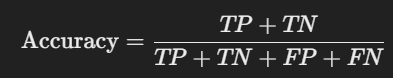


*   TP (True Positive): Prediksi positif yang benar
*   TN (True Negative): Prediksi negatif yang benar
*   FP (False Positive): Prediksi positif yang salah
*   FN (False Negative): Prediksi negatif yang salah

### **2. Precision**

Presisi ini mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan total prediksi positif.

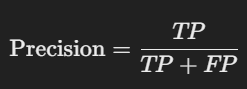

Maka, nilai presisi ini berguna untuk :


*   Nilai presisi tinggi berarti model jarang membuat kesalahan dengan mengklasifikasikan negatif sebagai positif (false positives).
*   Berguna saat false positive memiliki dampak besar





### **3. Recall**

Recall mengukur seberapa baik model menangkap semua kasus positif yang sebenarnya

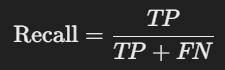

Dengan adanya recall, ini berarti model jarang melewatkan kelas positif yang sebenarnya (false negatives rendah).




### **4. F1-Score**

F1-score adalah rata-rata harmonik antara Presisi dan Recall.

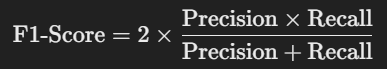

*   F1-Score ini berguna ketika dataset tidak seimbang (misalnya jumlah sampel positif jauh lebih sedikit dari negatif).
*   Nilai F1-score tinggi berarti keseimbangan presisi dan recall yang baik.
*   Salah satu cara untuk menyeimbangkan presisi dan recall adalah dengan F1-Score

**Jika F1-Score tinggi, berarti model memiliki keseimbangan presisi dan recall yang baik!**

### **5. AUC**

AUC adalah luas di bawah kurva ROC, yang mengukur kemampuan model untuk membedakan antara kelas positif dan negatif.

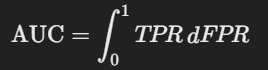


*   AUC = 1.0 → Model sempurna
*   AUC = 0.5 → Model seburuk tebakan acak
*   AUC < 0.5 → Model lebih buruk dari tebakan acak

### **6. ROC Curve**

ROC kurva yang menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) untuk berbagai threshold.

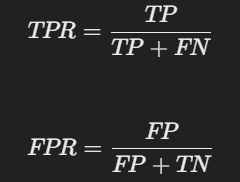

Kurva ROC menggambarkan trade-off antara Recall (TPR) dan False Positives (FPR)